# Test: Data analyses 2

**Author:** Maxime ABITBOL 21305862     
**Teacher:** Franck LIN - ADD2

## 1. Exercise 1 (60%)

### Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

import random
random.seed(30)

### Settings

In [2]:
!pwd
!ls ../data/

/home/maxime/Documents/Study/M1/ADD2/Exam/Data-Analyses-ADD2/src
Faces_Test_Inputs.csv  Faces_Train_Inputs.csv
Faces_Test_Labels.csv  Faces_Train_Labels.csv


In [3]:
PATH_DATA = "../data/"
PATH_TRAIN_X = PATH_DATA + "Faces_Train_Inputs.csv"
PATH_TRAIN_Y = PATH_DATA + "Faces_Train_Labels.csv"
PATH_TEST_X = PATH_DATA + "Faces_Test_Inputs.csv"
PATH_TEST_Y = PATH_DATA + "Faces_Test_Labels.csv"

### Load Data

In [4]:
df_train_x = pd.read_csv(PATH_TRAIN_X, sep=",", header=None)
df_train_y = pd.read_csv(PATH_TRAIN_Y, sep=",", header=None)
df_test_x = pd.read_csv(PATH_TEST_X, sep=",", header=None)
df_test_y = pd.read_csv(PATH_TEST_Y, sep=",", header=None)

### 1.1 Describe data & Face mean

Train y: 320 images, 40 people, 8 image of same people, dataset corresponding to the label

In [5]:
df_train_y.head()

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
0,1,1,1,1,1,1,1,1,2,2,...,39,39,40,40,40,40,40,40,40,40


Test y: 80 images, 40 people, 2 image of same people

In [6]:
df_test_y.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,1,1,2,2,3,3,4,4,5,5,...,36,36,37,37,38,38,39,39,40,40


Train x: 10304 pixels per images (92x112)

In [7]:
df_train_x.head()

,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
0,0.18824,0.17647,0.17647,0.19216,0.18039,0.18431,0.17647,0.18431,0.18824,0.207840,...,0.18431,0.17255,0.18431,0.20392,0.18824,0.192160,0.176470,0.180390,0.18431,0.180390
1,0.23529,0.22745,0.26667,0.30980,0.19216,0.16863,0.20392,0.20392,0.21961,0.282350,...,0.14510,0.15686,0.14118,0.12549,0.12941,0.145100,0.141180,0.129410,0.12157,0.133330
2,0.15294,0.17255,0.23137,0.21176,0.24314,0.27059,0.29020,0.23922,0.17255,0.184310,...,0.15294,0.14510,0.13333,0.12157,0.12549,0.133330,0.109800,0.109800,0.10588,0.113730
3,0.24706,0.21961,0.20392,0.15686,0.16863,0.16863,0.11373,0.11765,0.11765,0.094118,...,0.16078,0.16078,0.13725,0.12549,0.10588,0.094118,0.090196,0.098039,0.10980,0.094118
4,0.25098,0.23529,0.24706,0.20784,0.23529,0.16078,0.11765,0.10980,0.14902,0.215690,...,0.15686,0.17255,0.15686,0.16863,0.16471,0.160780,0.160780,0.137250,0.16471,0.152940


In [8]:
df_train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Columns: 10304 entries, 0 to 10303
dtypes: float64(10304)
memory usage: 25.2 MB


Test x: 10305 pixels per images

In [9]:
df_test_x.head()

,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
0,0.164706,0.160784,0.211765,0.188235,0.168627,0.156863,0.180392,0.176471,0.160784,0.160784,...,0.168627,0.156863,0.160784,0.164706,0.180392,0.164706,0.168627,0.156863,0.152941,0.160784
1,0.133333,0.137255,0.133333,0.133333,0.149020,0.141176,0.117647,0.105882,0.094118,0.105882,...,0.184314,0.172549,0.184314,0.168627,0.164706,0.149020,0.164706,0.160784,0.152941,0.129412
2,0.168627,0.149020,0.152941,0.145098,0.156863,0.160784,0.164706,0.168627,0.176471,0.152941,...,0.125490,0.125490,0.117647,0.109804,0.105882,0.098039,0.105882,0.109804,0.121569,0.552941
3,0.145098,0.121569,0.133333,0.149020,0.160784,0.156863,0.149020,0.164706,0.156863,0.152941,...,0.117647,0.121569,0.105882,0.098039,0.101961,0.090196,0.101961,0.105882,0.262745,0.521569
4,0.407843,0.407843,0.415686,0.419608,0.419608,0.423529,0.396078,0.419608,0.415686,0.407843,...,0.215686,0.227451,0.207843,0.215686,0.239216,0.243137,0.250980,0.247059,0.235294,0.219608


In [10]:
df_test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Columns: 10304 entries, 0 to 10303
dtypes: float64(10304)
memory usage: 6.3 MB


### Face mean (from train set)

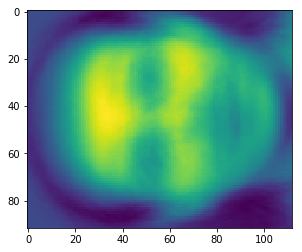

In [11]:
face_mean = np.mean(df_train_x)
matr_face_mean = np.reshape(face_mean.values, (92,112))
plt.imshow(matr_face_mean)

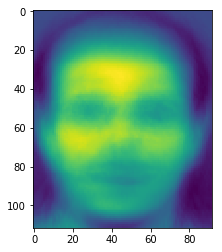

In [12]:
# to put the image in the right direction
plt.imshow(matr_face_mean.transpose())

### 1.2 PCA Reduction

In [78]:
from sklearn.preprocessing import StandardScaler

def my_PCA(k, X=df_train_x):
    
    sc= StandardScaler()
    Z=sc.fit_transform(X)
    pca = PCA(n_components=k)
    X_reduced = pca.fit_transform(Z)

    return X_reduced

print(df_train_x.shape)

(320, 10304)


Reduction with k=5

In [14]:
X_reduced5 = my_PCA(k=5)
X_reduced5.shape

(320, 5)

Reduction with k=10

In [15]:
X_reduced10 = my_PCA(k=10)
X_reduced10.shape

(320, 10)

Reduction with k=50

In [16]:
X_reduced50 = my_PCA(k=50)
X_reduced50.shape

(320, 50)

### 1.3 Plot image with PCA

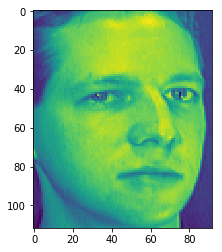

In [19]:
# test with the face number 5 without PCA
face5 = df_train_x.loc[4]
image5 = np.reshape(face5.values, (92,112))
plt.imshow(image5.transpose())

**Function that perform a PCA, rebuild the image and display it**

In [20]:
def PCAshow(k):
    pca = PCA(k)
    lower_dimension_data = pca.fit_transform(df_train_x) # PCA on data
    approximation = pca.inverse_transform(lower_dimension_data)  # Reconstruct Images
    face5pca = approximation[4] # Select Image 5
    image5pca = np.reshape(face5pca, (92,112)) # Image to Matrix 
    plt.imshow(image5pca.transpose()) # Plot image

**The same picture with a pca for k = 5**

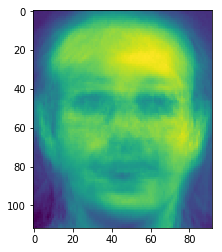

In [22]:
PCAshow(5)

**the same picture with a pca for k = 10**

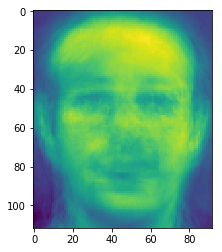

In [23]:
PCAshow(10)

**the same picture with a pca for k = 50**

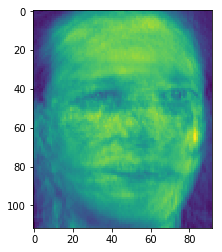

In [24]:
PCAshow(50)

### 1.4 How to accelerate PCA?

- Reduce the number of images to train (rows)
- Reduce the initial number of columns

### 1.5 Classification with K Nearest Neighborhood after PCA

### Implementation of KNN

In [25]:
def euclidean_dist(X_train_elm, elm):
    dist = np.sqrt(np.sum(pow(elm - X_train_elm, 2)))
    return dist

In [26]:
def find_nn(X_train, elm, k):
    dist_arr = {}
    
    for X_train_elm, i in zip(X_train.values, range(1, X_train.shape[0] + 1)):
        dist = euclidean_dist(X_train_elm, elm)        
        dist_arr[i] = dist

    arr_sort = sorted(dist_arr.items(), key=lambda kv: kv[1])
    
    return arr_sort[0:k]

In [27]:
def max_nn(k_nn, Y_train):
    index_nn = [tupl[0] - 1 for tupl in k_nn]
    
    #print(index_nn)
    
    
    k_nn_classe = Y_train[index_nn]
    k_nn_classe = np.ndarray.tolist(k_nn_classe)
    
    return max(k_nn_classe, key=k_nn_classe.count)

In [28]:
def my_knn(X_train, Y_train, X_test, k):
    Y_pred = []
    
    for elm in X_test.values:
        k_nn = find_nn(X_train, elm, k)
        classe = max_nn(k_nn, Y_train)
        Y_pred.append(classe)
        
    return Y_pred

### Test our KNN without PCA

In [71]:
# Get Y train values
Y_train = df_train_y.values.T
Y_train = Y_train.ravel()
# like: Y_train = Y_train.reshape(Y_train.shape[0], )

Y_test = df_test_y.values.T
Y_test = Y_test.ravel()

print("Shape of Y_train: {}\nShape of Y_test: {}".format(Y_train.shape, Y_test.shape))

Shape of Y_train: (320,)
Shape of Y_test: (80,)


In [72]:
Y_pred = my_knn(df_train_x, Y_train, df_test_x, 5)

In [73]:
_ = [print(elm, ' ', end='') for elm in Y_pred]

1  1  2  2  3  3  4  4  5  18  6  6  7  7  8  8  9  9  10  8  11  11  12  12  13  13  14  14  15  15  16  16  17  17  18  18  15  19  20  20  21  21  22  22  23  23  24  24  25  25  26  26  27  27  28  28  29  29  30  30  31  31  32  32  33  33  34  34  35  35  36  17  37  37  38  38  39  39  40  5  

In [74]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred) * 100, '%')

Accuracy: 93.75 %


### Test our KNN with PCA

In [40]:
def knn_pca(k_pca, k_knn, df_train_x, df_test_x):
    
    # Get reduced data before KNN
    X_train_reduced = my_PCA(k_pca, X=df_train_x)
    X_test_reduced = my_PCA(k_pca, X=df_test_x)
    
    # Launch the KNN
    Y_pred = my_knn(pd.DataFrame(X_train_reduced), Y_train, pd.DataFrame(X_test_reduced), k_knn)
    print("For a reduction dimension of {} and a k of {}, the accuracy is: {}%"
          .format(k_pca, k_knn, metrics.accuracy_score(Y_test, Y_pred) * 100))

In [89]:
knn_pca(50, 7, df_train_x, df_test_x)

For a reduction dimension of 50 and a k of 7, the accuracy is: 16.25%


In [84]:
knn_pca(10, 7, df_train_x, df_test_x)

For a reduction dimension of 10 and a k of 7, the accuracy is: 13.750000000000002%


In [81]:
knn_pca(5, 7, df_train_x, df_test_x)

For a reduction dimension of 5 and a k of 7, the accuracy is: 12.5%


### 1.6 Error analyses

When a K-Nearest Neigborhood is done **without a PCA**, the accuracy score is **great (~93%)**. The hyperparameter k for the KNN is best with an prime number. 

In another hand, when the face classification is done **with a PCA**, the accuracy score is **very low**, and decrease more the reduction PCA is lower (~15%, ~12%).

### 1.7 Recommendation to improve the model

- No PCA
- Lower PCA (if is done)
- More data
- Do multiple model of clustering classification and do a voting system like boosting on it

## 2. Exercise 2 (40%)